<p style="font-family:Verdana; font-size: 26px; color: magenta"> 4.0 - Customer Segmentation using Unsupervised Machine Learning</p>

<p style="font-family:Verdana; font-size: 18px; color: darkorange"> Customer Segmentation involves grouping customers based on shared characteristics, behaviors and preferences</p> 
<p style="font-family:Verdana; font-size: 18px; color: darkorange"> 1. - 
</p>

<p style="font-family:Verdana; font-size: 18px; color: orange"> Step 1: Import Libraries</p>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

<p style="font-family:Verdana; font-size: 20px; color: orange"> Step 2: Loading the Data</p>

In [6]:
# Ihe dataset contains 284,807 transactions with 31 features including:
df = pd.read_csv('../../data/new.csv')
 
df.sample(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
516,11025,1961,Graduation,Married,36443.0,1,1,03-02-2013,9,65,...,8,0,0,0,0,0,0,3,11,0
1372,10258,1965,Master,Single,35791.0,2,1,06-05-2013,94,27,...,8,0,0,0,0,0,0,3,11,0
1432,9349,1985,Graduation,Married,92533.0,0,0,19-12-2013,84,693,...,2,0,0,1,1,0,0,3,11,0


In [7]:
df.shape

(2240, 29)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


<p style="font-family:Verdana; font-size: 20px; color: orange"> Step 3: Data Preprocessing</p>

In [10]:
# To check the null values in the dataset.
for col in df.columns:
    temp = df[col].isnull().sum()
    if temp > 0:
        print(f'Column {col} contains {temp} null values.')

Column Income contains 24 null values.


In [11]:
df = df.dropna()
print("Total values in the dataset after removing the null values:", len(df))

Total values in the dataset after removing the null values: 2216


In [12]:
# Also dataset has a column Dt_Customer which contains the date column, we can convert into 3 columns i.e. day, month, year. 
parts = df["Dt_Customer"].str.split("-", n=3, expand=True)
df["day"] = parts[0].astype('int')
df["month"] = parts[1].astype('int')
df["year"] = parts[2].astype('int')

In [13]:
df_new = df.loc[:, ['ID','day', 'month', "year"]]
df_new[:4]

,ID,day,month,year
0,5524,4,9,2012
1,2174,8,3,2014
2,4141,21,8,2013
3,6182,10,2,2014


In [14]:
#  drop features like Z_CostContact, Z_Revenue, Dt_Customer.
df.drop(['Z_CostContact', 'Z_Revenue', 'Dt_Customer'],
        axis=1,
        inplace=True)

<p style="font-family:Verdana; font-size: 20px; color: orange"> Step 4: Data Visualization and Analysis</p>

In [15]:
# Data visualization is the graphical representation of information and data in a pictorial or graphical format. 

In [16]:
floats, objects = [], []
for col in df.columns:
    if df[col].dtype == object:
        objects.append(col)
    elif df[col].dtype == float:
        floats.append(col)

print(objects)
print(floats)

['Education', 'Marital_Status']
['Income']


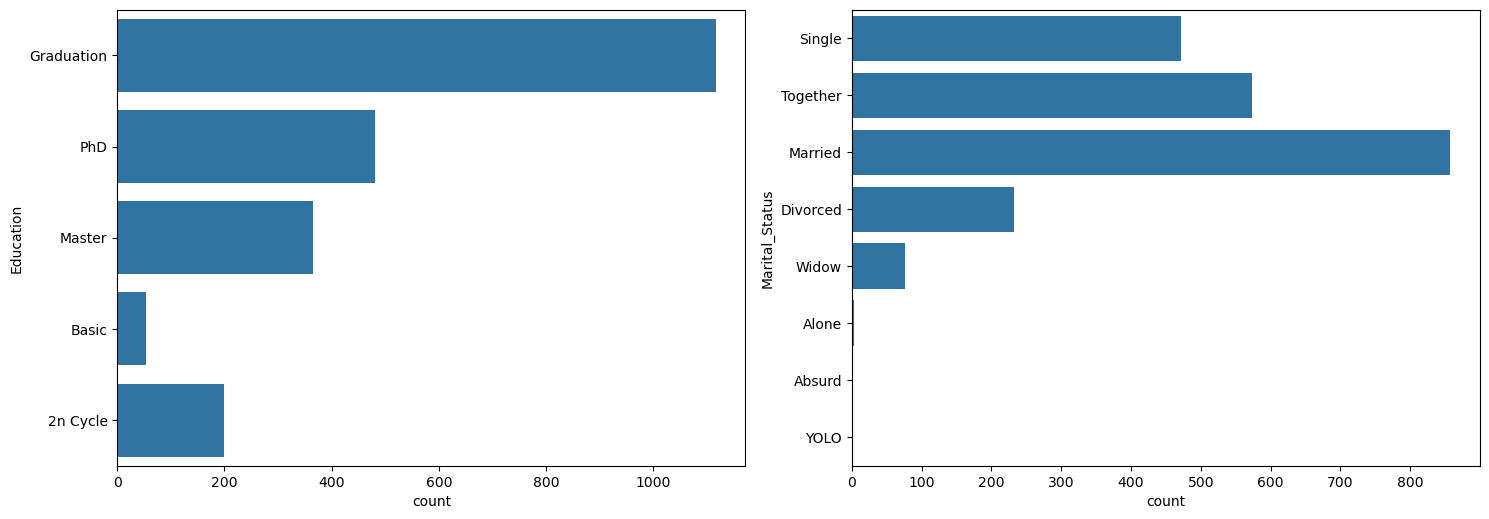

In [17]:
plt.figure(figsize=(15, 10))
 
 
for i, col in enumerate(objects):
    plt.subplot(2, 2, i+1)
    sb.countplot(df[col])

plt.tight_layout()
plt.show()

In [18]:
# Let's check the value_counts of the Marital_Status of the data.
df['Marital_Status'].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

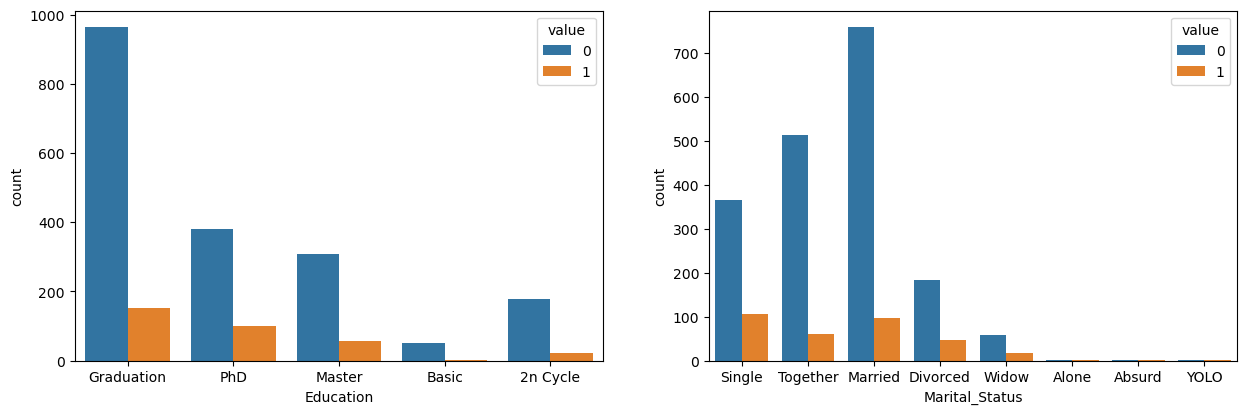

In [19]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(objects):
    plt.subplot(2, 2, i + 1)

    df_melted = df.melt(id_vars=[col], value_vars=['Response'], var_name='hue')
    sb.countplot(x=col, hue='value', data=df_melted)
plt.show()

> Label Encoding is used to convert the categorical values into the numerical values so that model can understand it.

In [20]:
for col in df.columns:
    if df[col].dtype == object:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

> Heatmap is the best way to visualize the correlation among the different features of dataset. Let's give it the value of 0.8

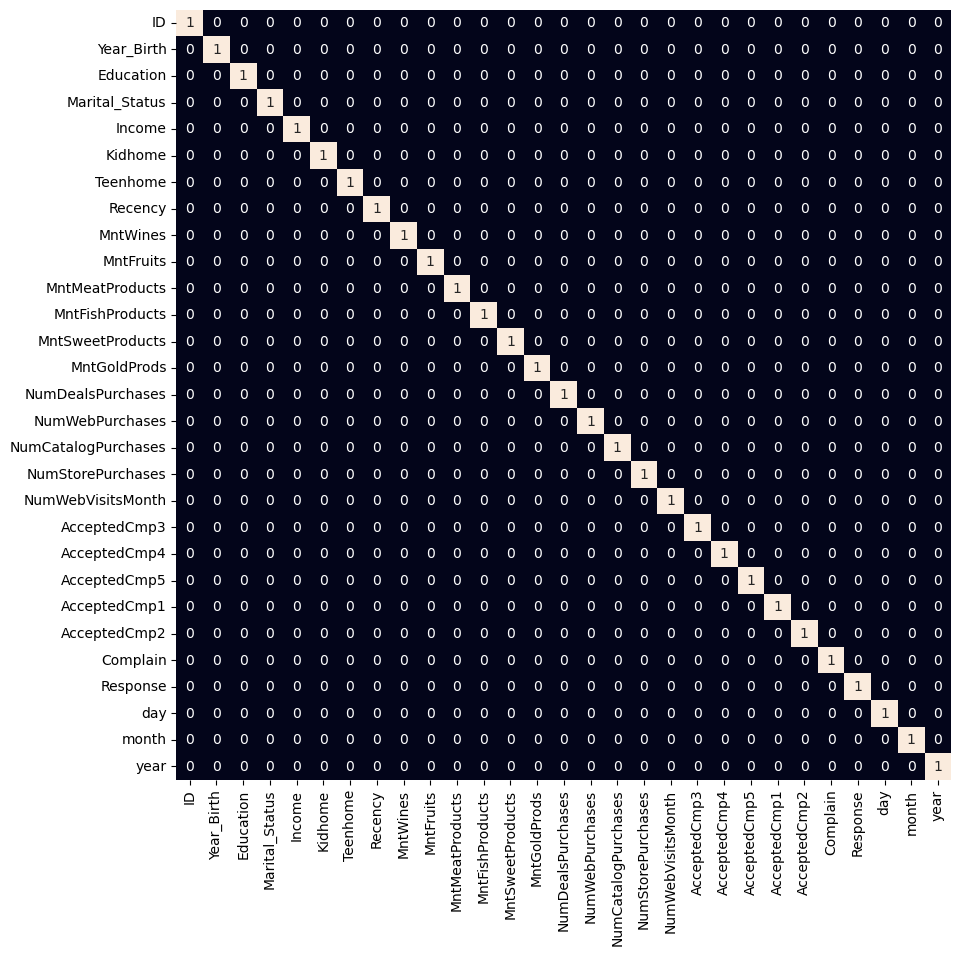

In [21]:
plt.figure(figsize=(10, 10))
sb.heatmap(df.corr() > 0.8, annot=True, cbar=False)
plt.show()

> Standardization is the method of feature scaling which is an integral part of feature engineering. 

In [22]:
scaler = StandardScaler()
data = scaler.fit_transform(df)

<p style="font-family:Verdana; font-size: 20px; color: orange"> Step 5: Segmentation</p>

In [23]:
# T-distributed Stochastic Neighbor Embedding (t-SNE) is a non linear dimensionality reduction technique used 
# for visualizing high-dimensional data in a lower-dimensional space mainly in 2D or 3D.

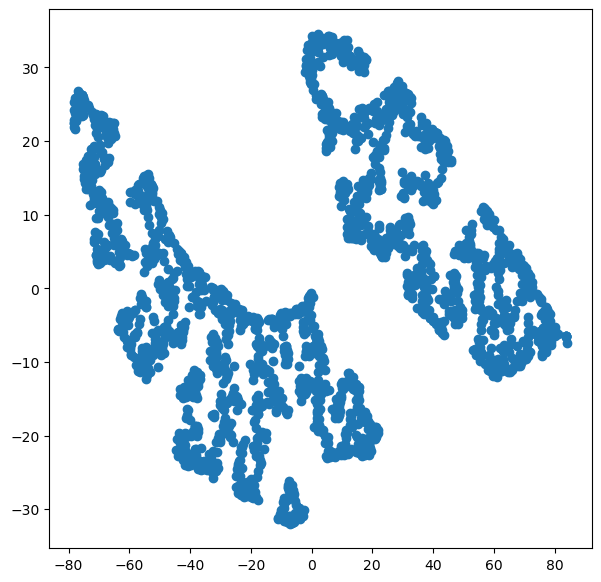

In [24]:
# We will be using T-distributed Stochastic Neighbor Embedding. It helps in visualizing high-dimensional data.
# It converts similarities between data points to joint probabilities 
# and tries to minimize the values to low-dimensional embedding.
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(df)
plt.figure(figsize=(7, 7))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1])
plt.show()

In [25]:
# There are certainly some clusters which are clearly visual from the 2-D representation of the given data. 
error = []
for n_clusters in range(1, 21):
    model = KMeans(init='k-means++',
                   n_clusters=n_clusters,
                   max_iter=500,
                   random_state=22)
    model.fit(df)
    error.append(model.inertia_)
# Here inertia is nothing but the sum of squared distances within the clusters.

> Here by using the elbow method we can say that k = 6 is the optimal number of clusters 

>> that should be made as after k = 6 the value of the inertia is not decreasing drastically.

In [26]:
model = KMeans(init='k-means++',
               n_clusters=6,
               max_iter=500,
               random_state=22)
segments = model.fit_predict(df)

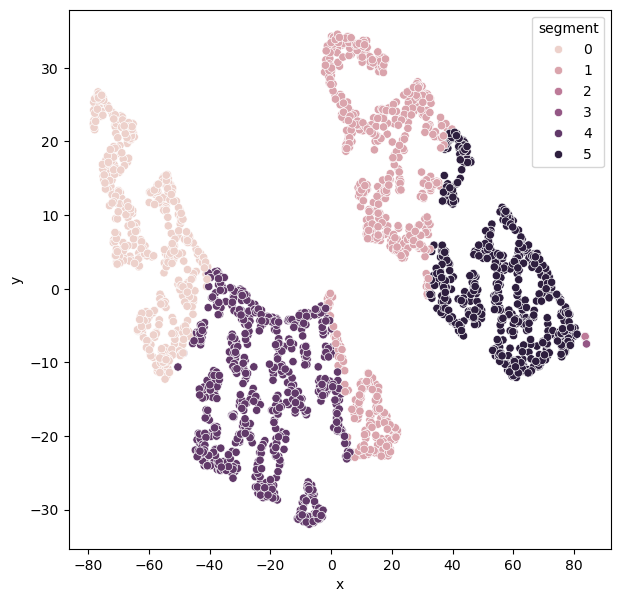

In [27]:
plt.figure(figsize=(7, 7))

df_tsne = pd.DataFrame({'x': tsne_data[:, 0], 'y': tsne_data[:, 1], 'segment': segments})
# Scatterplot will be used to see all the 6 clusters formed by KMeans Clustering.
sb.scatterplot(x='x', y='y', hue='segment', data=df_tsne)
plt.show()